In [1]:
from brian2 import *
import matplotlib.pyplot as plt

In [5]:
start_scope()
# Neurons
N_E = 1000
N_I = 250
V_th = 20*mV
V_res = 10*mV
t_ref = 2*ms
tau_m = 10*ms
neuron_eqs = '''
dV/dt = - V / tau_m : volt
'''
#a_plus = 0 : 1
#d_plus = 0 : 1
#dphi/dt = - phi / tau_ca : 1
nu_ext = 15*kHz
# Synapses
J = 0.1*mV
g = 8
J_I = - J * g

# Plasticity
tau_ca = 10*second
delta_T_s = 100

# Create Neurons
E = NeuronGroup(N_E, neuron_eqs, threshold='V>V_th', reset='V=V_res', refractory=t_ref)
#\nphi+=1/tau_ca
I = NeuronGroup(N_I, neuron_eqs, threshold='V>V_th', reset='V=V_res', refractory=t_ref)

# Background Input
P_E = PoissonInput(E, 'V', 1, 15*kHz, (tau_m/ms)*J)
P_I = PoissonInput(I, 'V', 1, 15*kHz, (tau_m/ms)*J)

# Static Synapses
S_I_I = Synapses(I, I, on_pre='V_post += (tau_m/ms)*J_I')
S_I_I.connect(p=0.1/N_I)

S_I_E = Synapses(I, E, on_pre='V_post += (tau_m/ms)*J_I')
S_I_E.connect(p=0.1/N_E)

S_E_I = Synapses(E, I, on_pre='V_post += (tau_m/ms)*J')
S_E_I.connect(p=0.1/N_I)

# Dynamic synapses
S_E_E = Synapses(E, E, model='''
c = 0 : 1
'''
#a_plus_pre = c : 1 (summed)
#d_plus_post = c : 1 (summed)
,on_pre='V_post += c*(tau_m/ms)*J')
S_E_E.connect()

M = SpikeMonitor(E)
run(0.01*second)

INFO       No numerical integration method specified for group 'neurongroup_3', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]


<synapses_8.N: 251>
<synapses_5.N: 228>
<synapses_7.N: 1055>


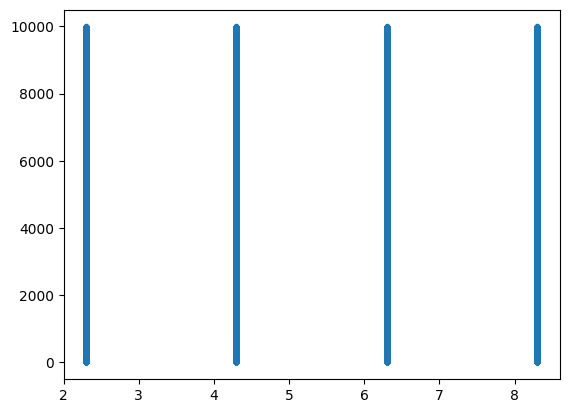

In [55]:
plot(M.t/ms, M.i, '.')
print(S_I_I.N)
print(S_I_E.N)
print(S_E_I.N)